In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import seaborn as sns


pd.set_option('display.max_columns', None)

In [2]:
full_table = pd.read_csv("data/dados TFM 2011.csv")
full_table

Categoria   Departamento            Produto Região   Loja   Evento  \
0       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_1  NoEvent   
1       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_2  NoEvent   
2       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_3  NoEvent   
3       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    NYC  NYC_3  NoEvent   
4       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    PHI  PHI_1  NoEvent   
...            ...            ...                ...    ...    ...      ...   
29994  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    NYC  NYC_2  NoEvent   
29995  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    NYC  NYC_4  NoEvent   
29996  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    PHI  PHI_1  NoEvent   
29997  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    PHI  PHI_2  NoEvent   
29998  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    PHI  PHI_3  NoEvent   

       Suma de Qtd. Vendida  Promedio de Preço médio de venda  
0                       272                               4.0  
1                       305                               4.0  
2                        52                               4.0  
3                       410                               4.0  
4                       536                               4.0  
...                     ...                               ...  
29994                    53                             826.0  
29995                    13                             826.0  
29996                    20                             826.0  
29997                     4                             826.0  
29998                    18                             826.0  

[29999 rows x 8 columns]

In [3]:
# Converter dados para uso no modelo
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(full_table[['Categoria','Departamento','Produto','Evento','Loja','Região']]).toarray()

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Categoria','Departamento','Produto','Evento','Loja','Região']))

df_encoded = pd.concat([full_table, encoded_df], axis=1)

df_encoded

Categoria   Departamento            Produto Região   Loja   Evento  \
0       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_1  NoEvent   
1       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_2  NoEvent   
2       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_3  NoEvent   
3       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    NYC  NYC_3  NoEvent   
4       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    PHI  PHI_1  NoEvent   
...            ...            ...                ...    ...    ...      ...   
29994  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    NYC  NYC_2  NoEvent   
29995  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    NYC  NYC_4  NoEvent   
29996  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    PHI  PHI_1  NoEvent   
29997  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    PHI  PHI_2  NoEvent   
29998  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    PHI  PHI_3  NoEvent   

       Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                       272                               4.0   
1                       305                               4.0   
2                        52                               4.0   
3                       410                               4.0   
4                       536                               4.0   
...                     ...                               ...   
29994                    53                             826.0   
29995                    13                             826.0   
29996                    20                             826.0   
29997                     4                             826.0   
29998                    18                             826.0   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       1.0                    0.0                    0.0   
1                       1.0                    0.0                    0.0   
2                       1.0                    0.0                    0.0   
3                       1.0                    0.0                    0.0   
4                       1.0                    0.0                    0.0   
...                     ...                    ...                    ...   
29994                   0.0                    0.0                    1.0   
29995                   0.0                    0.0                    1.0   
29996                   0.0                    0.0                    1.0   
29997                   0.0                    0.0                    1.0   
29998                   0.0                    0.0                    1.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            1.0                        0.0   
1                            1.0                        0.0   
2                            1.0                        0.0   
3                            1.0                        0.0   
4                            1.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996       

In [4]:
# Converter colunas para deixar somente numeros inteiros
df_encoded['Suma de Qtd. Vendida'].astype('int64')
df_encoded['Promedio de Preço médio de venda'].astype('int64')

df_encoded

Categoria   Departamento            Produto Região   Loja   Evento  \
0       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_1  NoEvent   
1       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_2  NoEvent   
2       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_3  NoEvent   
3       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    NYC  NYC_3  NoEvent   
4       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    PHI  PHI_1  NoEvent   
...            ...            ...                ...    ...    ...      ...   
29994  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    NYC  NYC_2  NoEvent   
29995  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    NYC  NYC_4  NoEvent   
29996  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    PHI  PHI_1  NoEvent   
29997  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    PHI  PHI_2  NoEvent   
29998  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_724    PHI  PHI_3  NoEvent   

       Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                       272                               4.0   
1                       305                               4.0   
2                        52                               4.0   
3                       410                               4.0   
4                       536                               4.0   
...                     ...                               ...   
29994                    53                             826.0   
29995                    13                             826.0   
29996                    20                             826.0   
29997                     4                             826.0   
29998                    18                             826.0   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       1.0                    0.0                    0.0   
1                       1.0                    0.0                    0.0   
2                       1.0                    0.0                    0.0   
3                       1.0                    0.0                    0.0   
4                       1.0                    0.0                    0.0   
...                     ...                    ...                    ...   
29994                   0.0                    0.0                    1.0   
29995                   0.0                    0.0                    1.0   
29996                   0.0                    0.0                    1.0   
29997                   0.0                    0.0                    1.0   
29998                   0.0                    0.0                    1.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            1.0                        0.0   
1                            1.0                        0.0   
2                            1.0                        0.0   
3                            1.0                        0.0   
4                            1.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996       

In [5]:
# Deixar somente colunas relevantes
df_encoded = df_encoded.drop(columns=['Categoria', 'Departamento','Produto','Evento','Loja','Região'])
df_encoded

Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                       272                               4.0   
1                       305                               4.0   
2                        52                               4.0   
3                       410                               4.0   
4                       536                               4.0   
...                     ...                               ...   
29994                    53                             826.0   
29995                    13                             826.0   
29996                    20                             826.0   
29997                     4                             826.0   
29998                    18                             826.0   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       1.0                    0.0                    0.0   
1                       1.0                    0.0                    0.0   
2                       1.0                    0.0                    0.0   
3                       1.0                    0.0                    0.0   
4                       1.0                    0.0                    0.0   
...                     ...                    ...                    ...   
29994                   0.0                    0.0                    1.0   
29995                   0.0                    0.0                    1.0   
29996                   0.0                    0.0                    1.0   
29997                   0.0                    0.0                    1.0   
29998                   0.0                    0.0                    1.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            1.0                        0.0   
1                            1.0                        0.0   
2                            1.0                        0.0   
3                            1.0                        0.0   
4                            1.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996                         0.0                         0.0   
29997                         0.0                         0.0   
29998                         0.0                         0.0   

       Departamento_SUPERMARKET_1  Departamento_SUPERMARKET_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996                         0.0                         0.0   
29997                         0.0                         0.0   
29998                         0.0               

In [6]:
# Criar StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
X_scaled

array([[-0.00398363, -1.47198244,  2.48014764, ...,  1.44199416,
        -0.84755685, -0.58844961],
       [ 0.03197701, -1.47198244,  2.48014764, ...,  1.44199416,
        -0.84755685, -0.58844961],
       [-0.2437212 , -1.47198244,  2.48014764, ...,  1.44199416,
        -0.84755685, -0.58844961],
       ...,
       [-0.27859212,  2.33713103, -0.4032018 , ..., -0.69348408,
        -0.84755685,  1.69938085],
       [-0.29602758,  2.33713103, -0.4032018 , ..., -0.69348408,
        -0.84755685,  1.69938085],
       [-0.28077155,  2.33713103, -0.4032018 , ..., -0.69348408,
        -0.84755685,  1.69938085]])

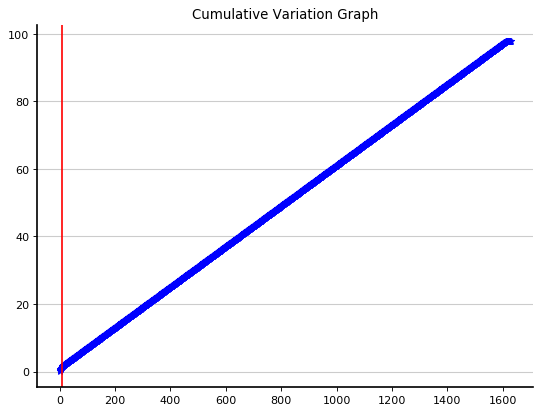

In [7]:
# Principal Components Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)
data_scaled_pca = pca.transform(X_scaled)
data_scaled_pca

# Determinar la varianza del dataset
var = pca.explained_variance_ratio_

# Determinar la varianza acumulada del dataset
cum_var = np.cumsum(np.round(var, decimals=4)*100)

# Gráfica de la varianza acumulada
fig, ax = plt.subplots(figsize=(8,6), dpi = 80)
plt.title("Cumulative Variation Graph")
plt.plot(cum_var, "b-*")
plt.axvline(x=8, color = "r")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

data = df_encoded

# numero de clusters
n_clusters = 3 

# modelo AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=n_clusters)

# Fit do modelo
clusters = model.fit_predict(data)

# add coluna cluster ao dataframe
data['cluster'] = clusters
data

Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                       272                               4.0   
1                       305                               4.0   
2                        52                               4.0   
3                       410                               4.0   
4                       536                               4.0   
...                     ...                               ...   
29994                    53                             826.0   
29995                    13                             826.0   
29996                    20                             826.0   
29997                     4                             826.0   
29998                    18                             826.0   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       1.0                    0.0                    0.0   
1                       1.0                    0.0                    0.0   
2                       1.0                    0.0                    0.0   
3                       1.0                    0.0                    0.0   
4                       1.0                    0.0                    0.0   
...                     ...                    ...                    ...   
29994                   0.0                    0.0                    1.0   
29995                   0.0                    0.0                    1.0   
29996                   0.0                    0.0                    1.0   
29997                   0.0                    0.0                    1.0   
29998                   0.0                    0.0                    1.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            1.0                        0.0   
1                            1.0                        0.0   
2                            1.0                        0.0   
3                            1.0                        0.0   
4                            1.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996                         0.0                         0.0   
29997                         0.0                         0.0   
29998                         0.0                         0.0   

       Departamento_SUPERMARKET_1  Departamento_SUPERMARKET_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996                         0.0                         0.0   
29997                         0.0                         0.0   
29998                         0.0               

In [14]:
data['cluster'].value_counts()

1    29222
2      648
0      129
Name: cluster, dtype: int64

In [15]:
import joblib

# Salvar o modelo em disco
joblib.dump(model, 'model_clustering/model_agglomerativeclustering_2011.pkl')

['model_clustering/model_agglomerativeclustering_2011.pkl']

In [17]:
data.to_csv('model_clustering/base_2011.csv')

In [18]:
# Obtendo os nomes das colunas originais
original_column_names = ['Categoria','Departamento','Produto','Evento','Loja','Região']

# Criando um DataFrame com as colunas originais
df_original = pd.DataFrame(encoder.inverse_transform(encoded_data), columns=original_column_names)
df_original

# # Certifique-se de que o número de linhas em df_original é o mesmo que em full_table
df_original.index = full_table.index

# # Concatenando o DataFrame original com as colunas originais
df_with_original_columns = pd.concat([data, df_original], axis=1)


# # Removendo as colunas codificadas
df_with_original_columns = df_with_original_columns.drop(columns=encoder.get_feature_names_out(original_column_names))

# # Visualizando o DataFrame com as colunas originais
df_with_original_columns.head()

Suma de Qtd. Vendida  Promedio de Preço médio de venda  cluster  \
0                   272                               4.0        1   
1                   305                               4.0        1   
2                    52                               4.0        1   
3                   410                               4.0        1   
4                   536                               4.0        1   

    Categoria  Departamento           Produto   Evento   Loja Região  
0  ACCESORIES  ACCESORIES_1  ACCESORIES_1_234  NoEvent  BOS_1    BOS  
1  ACCESORIES  ACCESORIES_1  ACCESORIES_1_234  NoEvent  BOS_2    BOS  
2  ACCESORIES  ACCESORIES_1  ACCESORIES_1_234  NoEvent  BOS_3    BOS  
3  ACCESORIES  ACCESORIES_1  ACCESORIES_1_234  NoEvent  NYC_3    NYC  
4  ACCESORIES  ACCESORIES_1  ACCESORIES_1_234  NoEvent  PHI_1    PHI

In [21]:
df_with_original_columns['Ano'] = 2011
df_with_original_columns.to_csv('model_clustering/base_original_2011.csv')